In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
from pandas import CategoricalDtype
from plotnine import *
from rdkit.Chem import Descriptors, MolFromSmiles
from draw_data_distribution import plot_dis

In [2]:
plt.rcParams['font.family'] = 'arial'

In [3]:
def get_weight(rxn: str) -> float:
    mol = MolFromSmiles(rxn.split('>>')[1])
    return Descriptors.MolWt(mol)
def get_n_components(rxn: str) -> int:
    n_components = len((rxn.split('>>')[0].split('.')))
    if n_components >= 4:
        rtn = 4
    else:
        rtn = n_components
    return rtn

In [4]:
DIR = Path('data/biocatalysisV6')
DATA = DIR / 'data.csv'
IMG_DIR = Path('imgs')

In [5]:
df = pd.read_csv(DATA, index_col=0)
df['weight'] = df['canonized_rxns'].apply(get_weight)
df['n_components'] = df['canonized_rxns'].apply(get_n_components).astype(CategoricalDtype(categories=[3, 4, 2], ordered=True))

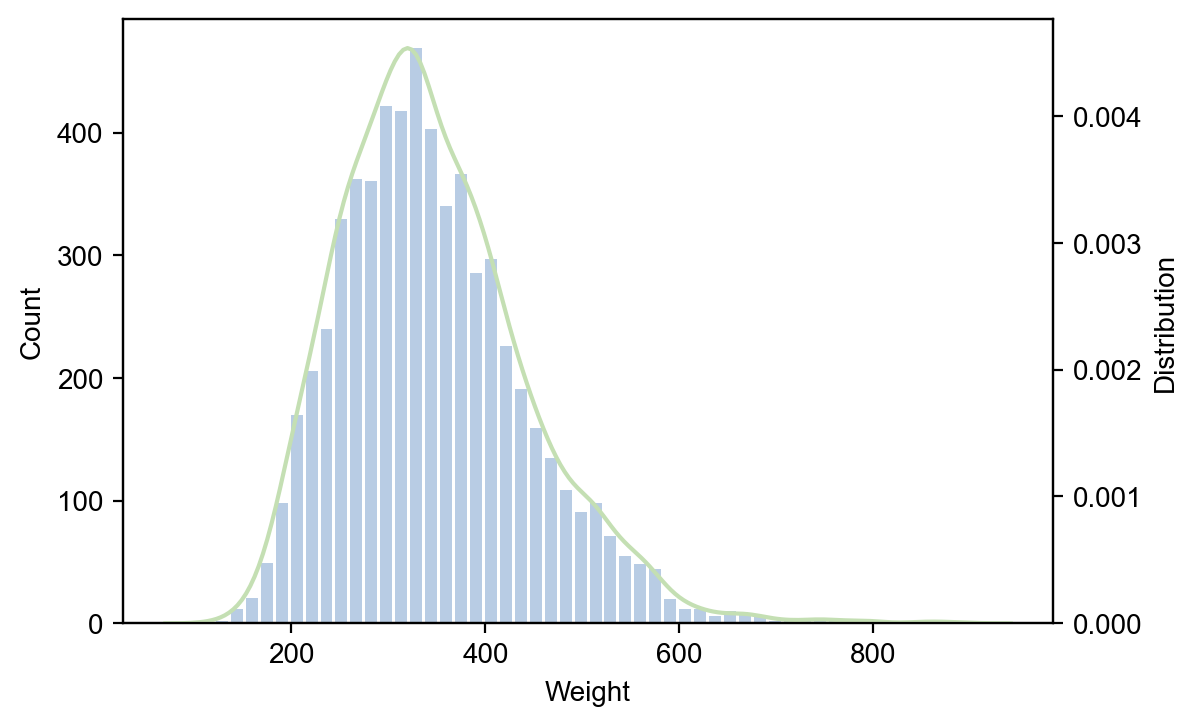

In [6]:
fig, ax = plt.subplots(dpi=200)
ax.hist(df['weight'],50,color=[i/256 for i in (185,205,229)],rwidth=0.8,alpha=1)
ax.set_ylabel('Count')
ax.set_xlabel('Weight')
ax2 = plt.twinx()
sns.kdeplot(df['weight'], ax=ax2, color=[i/256 for i in (197,224,180)],alpha=1)
ax2.set_ylabel('Density')
plt.xlabel("E_g")
plt.ylabel("Distribution")
plt.savefig('./分布图.png')
plt.show()

In [7]:
def component_map(n: int):
    if n == 4:
        return 3
    else:
        return n
data = df[['weight', 'n_components']]

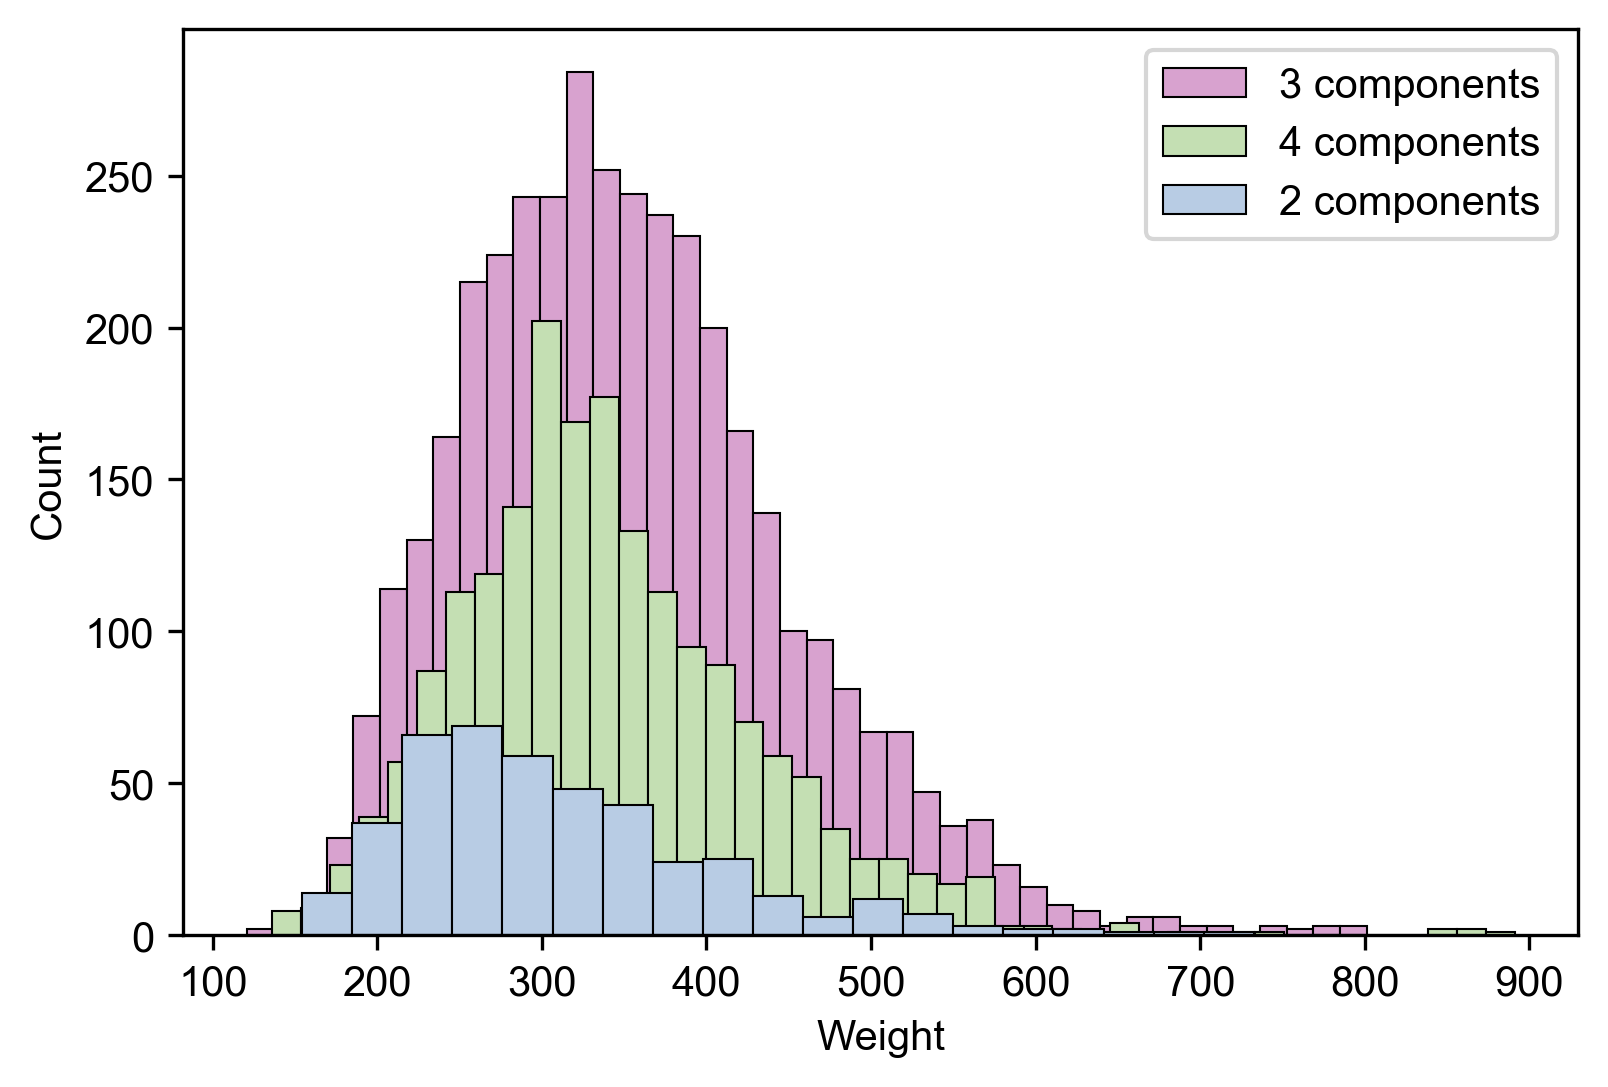

In [10]:
colors = []
colors.append([i/256 for i in (217,163,208)])
colors.append([i/256 for i in (197,224,180)])
colors.append([i/256 for i in (185,205,229)])

fig, ax = plt.subplots(dpi=300)
i = 0
for n, g in data.groupby('n_components'):
    sns.histplot(g['weight'], ax=ax, color=colors[i], label=f'{n} components', fill=n, alpha=1, lw=0.5)
    i += 1
plt.xlabel('Weight')
plt.legend()
plt.show()